## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
# importujeme potrebné knižnice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

In [2]:
#načítame data zo suboru Telecom-Churn.csv do dátového rámca:
data_telecom = pd.read_csv("../data/Telecom-Churn.csv")

#rozmery tabulky
print("Rozmer tabulky (riadky/stlpce):",data_telecom.shape)
print()
#stlpce tabulky
print("Stplce tabulky:", data_telecom.columns)

Rozmer tabulky (riadky/stlpce): (7043, 22)

Stplce tabulky: Index(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [3]:
#zobrazime prve riadky tabulky
data_telecom.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#odstránenime nepotrebne atribúty Unnamed a CustomerID, 
# pretoze prvy nepomenovany atribut je len poradie riadka 
# a CustomerID je generovany tak, ze nevieme z neho vydolovat ziadnu znalosti
data_telecom = data_telecom.drop(columns=["Unnamed: 0", "CustomerID"])
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [4]:
#základné štatistiky pre číselné atribúty
#mean = priemer, std = standardna odchylka. 50% = median, ..
# v count vidime, ci niektore hodnoty su chybajuce
data_telecom.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7017.000000,7032.000000
mean,0.162147,32.371149,64.707482,2283.300441
std,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,401.450000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


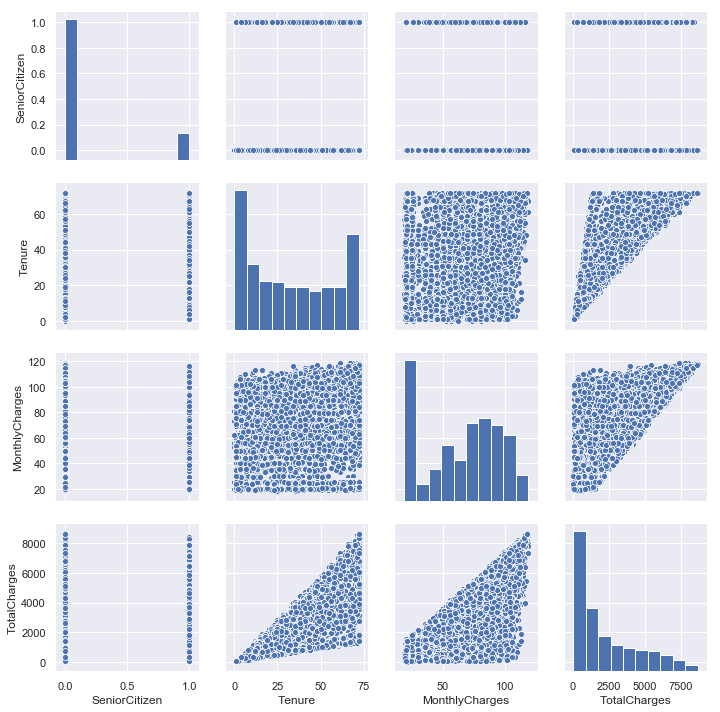

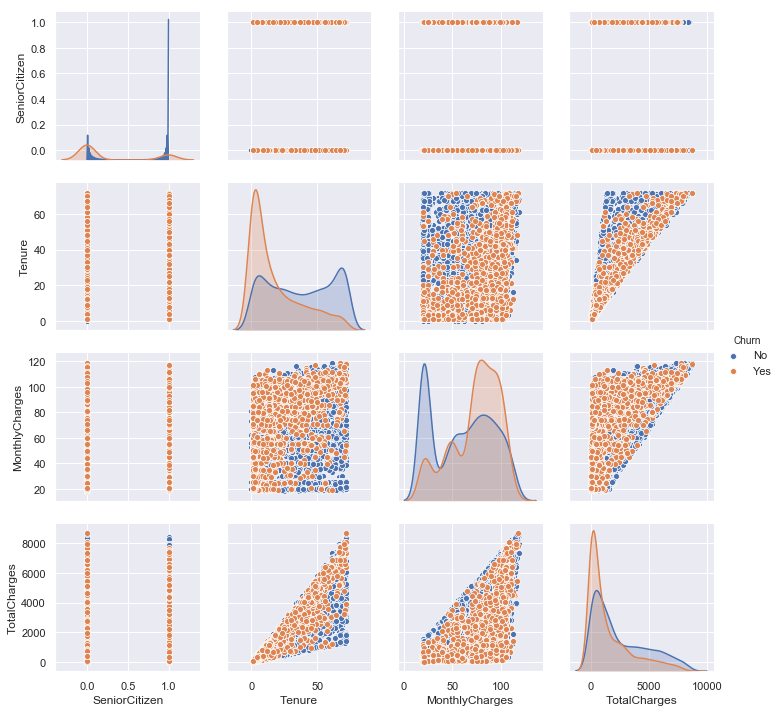

In [9]:
# pre ciselne hodnoty vizualizacia distribúcie pravdepodobnosti výskytu hodnôt:
# mozeme vyuzit napr pairplot - distribucia pravdepodobnosti je na diagonale
# pluz vzajomna distribucia dvoch numerickuch parametrov

g = sns.pairplot(data_telecom)
#alebo aj takto - vizualizujeme distribuciu zvlast pre odidenich a neodidenych
g = sns.pairplot(data_telecom, hue='Churn' )

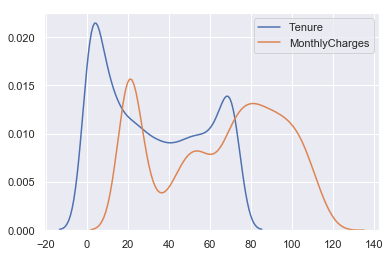

In [10]:
# tu vykreslime naraz dve distribucie vyskytov parametra Tenure a MonthlyCharges
for col in ['Tenure', 'MonthlyCharges']:   
    sns.kdeplot(data_telecom[col])          

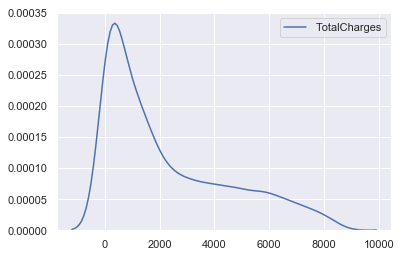

In [12]:
# distribucia vyskytu parametra TotalCharges
sns.kdeplot(data_telecom['TotalCharges']) 

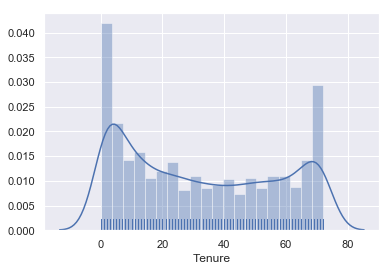

In [17]:
#distribúcia pravdepodobnosti výskytu hodnôt pre parametera Tenure vyuzitim distplotu 
g = sns.distplot(data_telecom['Tenure'], bins=20, rug=True)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


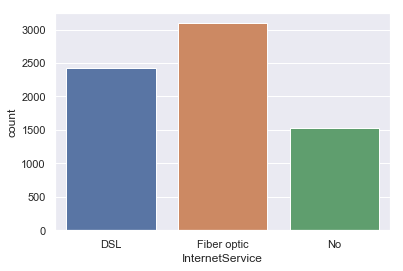

In [23]:
# Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt: 
#Vykreslite pre ne histogramy:
print(data_telecom['InternetService'].value_counts())
g = sns.countplot(x='InternetService', data=data_telecom)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


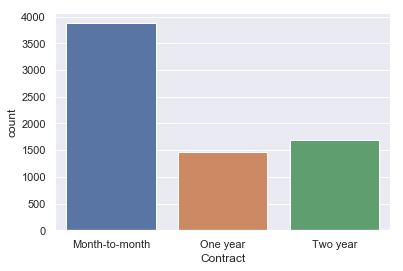

In [25]:
print(data_telecom['Contract'].value_counts())
g = sns.countplot(x='Contract', data=data_telecom)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


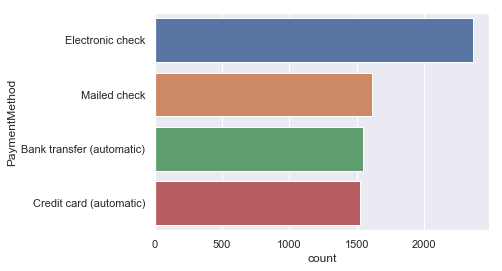

In [26]:
print(data_telecom['PaymentMethod'].value_counts())
g = sns.countplot(y='PaymentMethod', data=data_telecom)

Male      3555
Female    3488
Name: Gender, dtype: int64


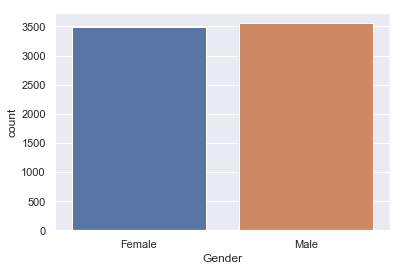

In [28]:
print(data_telecom['Gender'].value_counts())
g = sns.countplot(x='Gender',data=data_telecom)

No     5174
Yes    1869
Name: Churn, dtype: int64


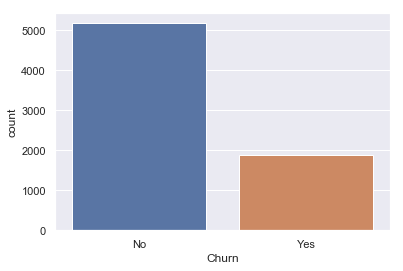

In [30]:
print(data_telecom['Churn'].value_counts())
g = sns.countplot(x='Churn',data=data_telecom)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


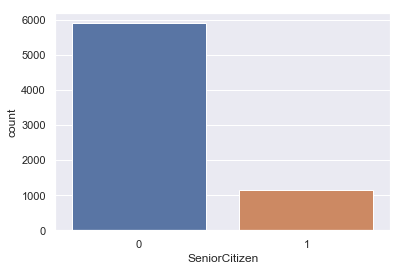

In [31]:
print(data_telecom['SeniorCitizen'].value_counts())
g = sns.countplot(x='SeniorCitizen',data=data_telecom)

No     3641
Yes    3402
Name: Partner, dtype: int64


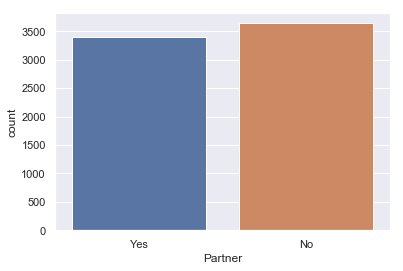

In [32]:
print(data_telecom['Partner'].value_counts())
g = sns.countplot(x='Partner',data=data_telecom)

No     4921
Yes    2102
Name: Dependents, dtype: int64


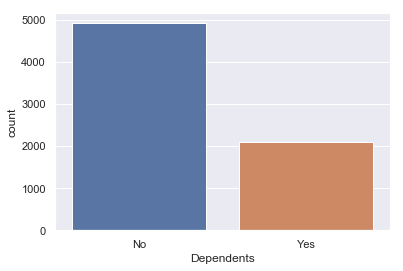

In [33]:
print(data_telecom['Dependents'].value_counts())
g = sns.countplot(x='Dependents',data=data_telecom)

In [5]:
#počet chýbajúcich hodnôt:
#v atributoch  Dependents, MonthlyCharges a TotalCharges su chybajuce hodnoty

data_telecom.isna().sum()  

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [6]:
factors = data_telecom[["Tenure", "MonthlyCharges", "TotalCharges"]]
corr_table = factors.corr()
corr_table
# silna zavislost 0,82 - priama umera - je medzi atributmi TotalCharges a Tenure
# cim je dlsie u operatora tym aj viac celkovo zaplatil

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


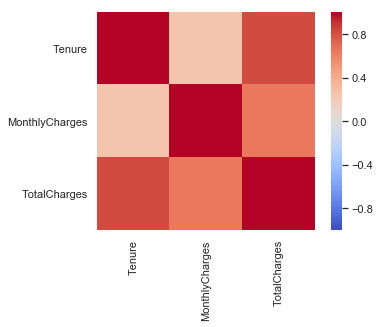

In [63]:
p = sns.heatmap(corr_table,
               xticklabels=corr_table.columns, yticklabels=corr_table.columns,
               vmin=-1, vmax=1,
                cmap='coolwarm',
                square=True)

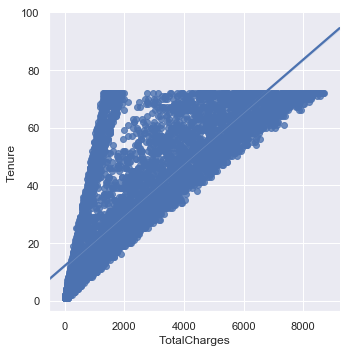

In [46]:
# najviac korelované atribúty
p = sns.lmplot(data=data_telecom, x='TotalCharges', y='Tenure', fit_reg=True) 

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [17]:
data_telecom["MonthlyCharges_ordinal"] = pd.cut(data_telecom["MonthlyCharges"], 5, labels=["very cheap", "cheap", "normal", "expensive", "very expensive"])

# zobrazíme ordinálne hodnoty a ich početnosti
data_telecom["MonthlyCharges_ordinal"].value_counts()

expensive         1826
very cheap        1798
normal            1368
very expensive    1047
cheap             1004
Name: MonthlyCharges_ordinal, dtype: int64

In [18]:
data_telecom["TotalCharges_ordinal"] = pd.cut(data_telecom["TotalCharges"], 5, labels=["very small amount", "small amount", "normal amount", "big amount", "very big amount"])

# zobrazíme ordinálne hodnoty a ich početnosti
data_telecom["TotalCharges_ordinal"].value_counts()

very small amount    3928
small amount         1188
normal amount         874
big amount            707
very big amount       346
Name: TotalCharges_ordinal, dtype: int64

In [19]:
#diskretizácia atribútu Tenure na 5 intervalov s rovnakou početnosťou príkladov:

data_telecom["Tenure_ordinal"] = pd.qcut(data_telecom["Tenure"], 5, labels=["very short", "short", "mean", "long", "very long"])
data_telecom["Tenure_ordinal"].value_counts()

very short    1481
mean          1408
very long     1407
short         1397
long          1350
Name: Tenure_ordinal, dtype: int64

In [10]:
print(data_telecom.columns)
data_telecom.head()

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_ordinal',
       'TotalCharges_ordinal', 'Tenure_ordinal'],
      dtype='object')


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,very cheap,very small amount,very short
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,cheap,small amount,mean
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,cheap,very small amount,very short
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short


### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [11]:
# pridame novy parameter Churn_01, vytvoreny z namapovania Churn kde Yes = 1 a No = 0
# pre pripad, zeby sme chceli v konting tabulke vidiet v percentach kolko ludi odislo (res. zostalo)

data_telecom['Churn_01'] = data_telecom['Churn'].map({"No": 0, "Yes": 1})
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,Churn_01
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,very cheap,very small amount,very short,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,cheap,small amount,mean,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,cheap,very small amount,very short,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short,1


In [21]:
#kontingencna tabulka - pomocou funkcie mean a boolosvkeho Churn si vizualizujeme percectualne zastupenie odidenych
# vysledok je taky - ze cim je vyssia mesacna platba a cim kratsie vyuziva sluzbu, tak zastupenie odidenych je vyssie
data_telecom_pivot = pd.pivot_table(data_telecom, index=["Tenure_ordinal"], columns=["MonthlyCharges_ordinal"],values=["Churn_01"], aggfunc=["mean"])
data_telecom_pivot

mean                                             
                         Churn_01                                             
MonthlyCharges_ordinal very cheap     cheap    normal expensive very expensive
Tenure_ordinal                                                                
very short               0.303493  0.493976  0.645533  0.741935       0.833333
short                    0.105000  0.237668  0.315113  0.571429       0.694118
mean                     0.037143  0.147783  0.196154  0.347722       0.426136
long                     0.032680  0.119205  0.099585  0.186782       0.308725
very long                0.003534  0.043956  0.024752  0.053908       0.139073

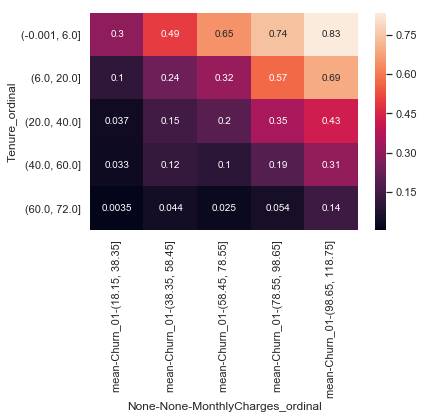

In [51]:
g = sns.heatmap(data_telecom_pivot, annot=True)  

In [73]:
#kontingenčná tabuľka - závislosť medzi atribútmi Tenure, MonthlyCharges a Churn
# zistenie - priemerna vyska platby stupa, cim zakaznik dlhsie vyuziva sluzbu
# zistenie 2 - priemerna vyska platby bola vyssie u zakaznikov ktory odisli

data_telecom_pivot = pd.pivot_table(data_telecom, index=["Churn", "Tenure_ordinal"],values=["MonthlyCharges"], aggfunc="mean")
data_telecom_pivot

MonthlyCharges
Churn Tenure_ordinal                
No    (-0.001, 6.0]        44.656547
      (6.0, 20.0]          51.515875
      (20.0, 40.0]         59.377060
      (40.0, 60.0]         65.796916
      (60.0, 72.0]         74.352984
Yes   (-0.001, 6.0]        63.660230
      (6.0, 20.0]          76.279095
      (20.0, 40.0]         82.901115
      (40.0, 60.0]         87.830144
      (60.0, 72.0]         97.317742

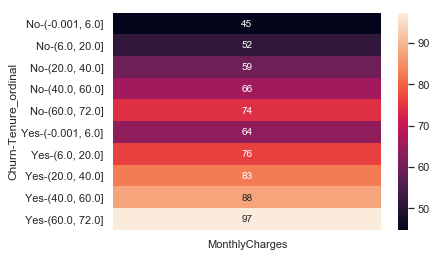

In [74]:
g = sns.heatmap(data_telecom_pivot, annot=True) 

In [78]:
#dalsi priklas zostavenia kontingecnej tabulky
data_telecom_pivot = pd.pivot_table(data_telecom, index=["Churn", "Tenure_ordinal"], columns=["MonthlyCharges_ordinal"],values=["TotalCharges"], aggfunc=["count"])
data_telecom_pivot

count                                \
                         TotalCharges                                 
MonthlyCharges_ordinal (18.15, 38.35] (38.35, 58.45] (58.45, 78.55]   
Churn Tenure_ordinal                                                  
No    (-0.001, 6.0]               313            166            121   
      (6.0, 20.0]                 358            170            213   
      (20.0, 40.0]                337            173            209   
      (40.0, 60.0]                296            133            217   
      (60.0, 72.0]                282             87            197   
Yes   (-0.001, 6.0]               139            164            224   
      (6.0, 20.0]                  42             53             98   
      (20.0, 40.0]                 13             30             51   
      (40.0, 60.0]                 10             18             24   
      (60.0, 72.0]                  1              4              5   

                                                       
                                                       
MonthlyCharges_ordinal (78.55, 98.65] (98.65, 118.75]  
Churn Tenure_ordinal                                   
No    (-0.001, 6.0]                79               5  
      (6.0, 20.0]                 159              26  
      (20.0, 40.0]                272             101  
      (40.0, 60.0]                283             206  
      (60.0, 72.0]                351             390  
Yes   (-0.001, 6.0]               230              25  
      (6.0, 20.0]                 212              59  
      (20.0, 40.0]                145              75  
      (40.0, 60.0]                 65              92  
      (60.0, 72.0]                 20              63

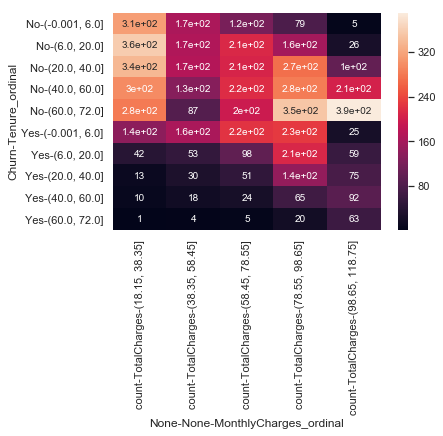

In [76]:
g = sns.heatmap(data_telecom_pivot, annot=True) 

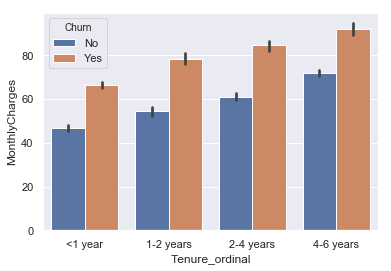

In [154]:
#ina vizualizácia pomocou Seaborn:

g = sns.barplot(x='Tenure_ordinal', y='MonthlyCharges', hue="Churn", data=data_telecom)
# cim je dlhsie u operator, tak jeho mesacne platba rastie

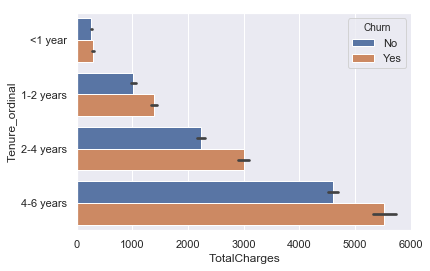

In [155]:
g = sns.barplot(x='TotalCharges', y='Tenure_ordinal', hue="Churn", data=data_telecom)
# cim je dlshie u operatora, tak mu viac zaplatil

In [81]:
#kontingencna tabulka - závislosť medzi atribútmi Gender, SeniorCitizen a Churn
# zistenie - 25 percent zakaznikov ktori odisli boli seniori, a 12 percent zakaznikov ktori neodisli su seniori 
# genderove zastupenie je priblizne rovnake 
data_telecom_pivot = pd.pivot_table(data_telecom, index=["Churn"], columns=["Gender"],values=["SeniorCitizen"], aggfunc=["mean"])
data_telecom_pivot


mean          
       SeniorCitizen          
Gender        Female      Male
Churn                         
No          0.128678  0.128762
Yes         0.255591  0.253763

In [84]:
#krizova tabulka - početnosť rôznych kombinácií služieb pre atribúty 
#PhoneService, InternetService, StreamingTV, StreamingMovies.
# zistenie - zakaznici ktory nemaju internet 1526, nemaku StreamintTV ani StreamingMovies, maju len Phoneservice
# zistenie 2 - najviac takych co maju DSL, maju este telefon a uz nic.
# zistenie 3 - najviac takych co maju Fiber optic, maju aj telefon a TV a Movies
# zistenie 4 - je viac takych pripadov, ze si TV a Movies objednavaju spolu
data_telecom_crosstab = pd.crosstab(columns=[data_telecom["InternetService"]], index=[data_telecom["PhoneService"], data_telecom["StreamingTV"], data_telecom["StreamingMovies"]])
data_telecom_crosstab

InternetService                                       DSL  Fiber optic    No
PhoneService StreamingTV         StreamingMovies                            
No           No                  No                   299            0     0
                                 Yes                   98            0     0
             Yes                 No                    85            0     0
                                 Yes                  200            0     0
Yes          No                  No                   814          905     0
                                 Yes                  253          441     0
             No internet service No internet service    0            0  1526
             Yes                 No                   242          440     0
                                 Yes                  430         1310     0

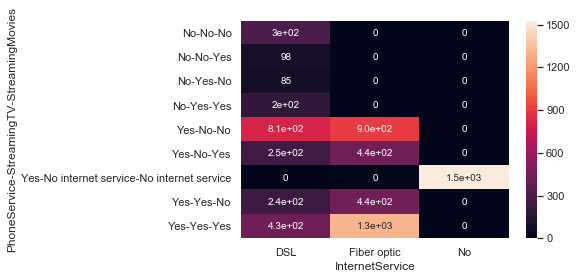

In [88]:
#vizualizácia pomocou Seaborn knižnice:

g = sns.heatmap(data_telecom_crosstab, annot=True) 

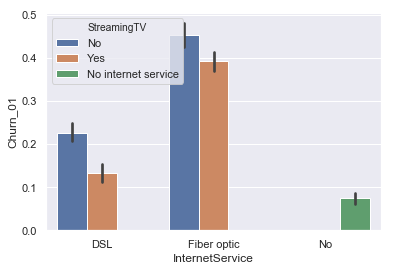

In [89]:
g = sns.barplot(x='InternetService', y='Churn_01', hue="StreamingTV", data=data_telecom)

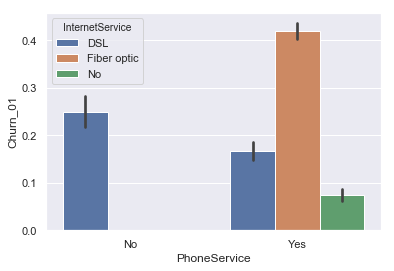

In [91]:
g = sns.barplot(x='PhoneService', y='Churn_01', hue="InternetService", data=data_telecom)

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [20]:
data_telecom.isna().sum()

Gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
Tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
MonthlyCharges_ordinal    0
TotalCharges_ordinal      0
Tenure_ordinal            0
Churn_01                  0
dtype: int64

In [13]:
# nahraďte chýbajúce hondnoty v atribúte MonthlyCharges
x = data_telecom.eval("TotalCharges / Tenure")
data_telecom["MonthlyCharges"].fillna(x, inplace=True) 
data_telecom["MonthlyCharges"].isna().sum()

0

In [14]:
# nahraďte chýbajúce hondnoty v atribúte TotalCharges
x = data_telecom.eval("MonthlyCharges * Tenure")
data_telecom["TotalCharges"].fillna(x, inplace=True) 
data_telecom["TotalCharges"].isna().sum()

0

In [25]:
# nahradenie chýbajúcich hodnôt v atribúte Dependents v závislosti od atribútov Gender a Partner.
# ked nemaju partnera tak vo vacsine pripadov je Dependents = No
# ak maju partnera tak je zastupenie Dependents rovnake
pd.crosstab(index=[data_telecom["Gender"], data_telecom["Partner"]], columns=data_telecom["Dependents"])

Dependents        No  Yes
Gender Partner           
Female No       1646  144
       Yes       804  880
Male   No       1624  214
       Yes       847  864

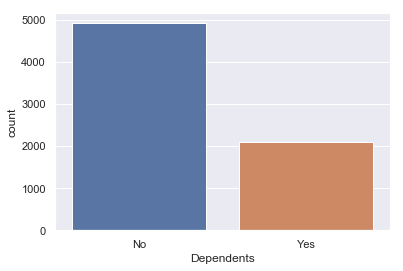

In [26]:
# kedze ide len o 20 pripadov tak si to zjednodusime a chybajuce hodnoty nahradime vacsinovou hodnotou No
sns.countplot(x='Dependents', data=data_telecom)

In [15]:
data_telecom["Dependents"].fillna("No", inplace=True) 
data_telecom["Dependents"].isna().sum()

0

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [21]:
# vytvorenie nového atribútu TotalMonthCharges:

data_telecom['TotalMonthCharges'] = data_telecom['MonthlyCharges'] * data_telecom['Tenure']
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,Churn_01,TotalMonthCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,very cheap,very small amount,very short,0,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,cheap,small amount,mean,0,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,cheap,very small amount,very short,1,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long,0,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short,1,141.40


In [22]:
#vytvorenie nového atribútu TotalRatio:

def map_TotalMonthCharges(TotalMonthCharges):
    if {"TotalMonthCharges < TotalCharges"}:
        return "-1"
    elif {"TotalMonthCharges == TotalCharges"}:
        return "0"
    elif {"TotalMonthCharges > TotalCharges"}:
        return "+1";
    

data_telecom["TotalRatio"] = data_telecom["TotalMonthCharges"].apply(map_TotalMonthCharges)
data_telecom["TotalRatio"].value_counts()

-1    7043
Name: TotalRatio, dtype: int64

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [23]:
# transformácia kategorických atribútov:

# importujeme potrebné funkcie
from sklearn.preprocessing import LabelEncoder

data_telecom["Gender"] = LabelEncoder().fit_transform(data_telecom["Gender"])
data_telecom["Partner"] = data_telecom["Partner"].map({"No": 0, "Yes": 1})
data_telecom["Dependents"] = data_telecom["Dependents"].map({"No": 0, "Yes": 1})
data_telecom["PhoneService"] = data_telecom["PhoneService"].map({"No": 0, "Yes": 1})
data_telecom["MultipleLines"] = data_telecom["MultipleLines"].map({"No phone service": 0, "No": 0, "Yes": 1})
data_telecom["OnlineSecurity"] = data_telecom["OnlineSecurity"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["OnlineBackup"] = data_telecom["OnlineBackup"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["DeviceProtection"] = data_telecom["DeviceProtection"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["TechSupport"] = data_telecom["TechSupport"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["StreamingTV"] = data_telecom["StreamingTV"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["StreamingMovies"] = data_telecom["StreamingMovies"].map({"No internet service": 0, "No": 0, "Yes": 1})
data_telecom["Contract"] = data_telecom["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data_telecom["PaperlessBilling"] = data_telecom["PaperlessBilling"].map({"No": 0, "Yes": 1})
data_telecom["MonthlyCharges_ordinal"] = data_telecom["MonthlyCharges_ordinal"].map({"very cheap": 0, "cheap": 1, "normal":2, "expensive":3, "very expensive":4})
data_telecom["TotalCharges_ordinal"] = data_telecom["TotalCharges_ordinal"].map({"very small amount": 0, "small amount": 1, "normal amount":2, "big amount":3, "very big amount":4})
data_telecom["Tenure_ordinal"] = data_telecom["Tenure_ordinal"].map({"very short": 0, "short": 1, "mean":2, "long":3, "very long":4})
data_telecom["Churn"] = data_telecom["Churn"].map({"No": 0, "Yes": 1})


data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,Churn_01,TotalMonthCharges,TotalRatio
0,0,0,1,0,1,0,0,DSL,0,1,...,Electronic check,29.85,29.85,0,0,0,0,0,29.85,-1
1,1,0,0,0,34,1,0,DSL,1,0,...,Mailed check,56.95,1889.50,0,1,1,2,0,1936.30,-1
2,1,0,0,0,2,1,0,DSL,1,1,...,Mailed check,53.85,108.15,1,1,0,0,1,107.70,-1
3,1,0,0,0,45,0,0,DSL,1,0,...,Bank transfer (automatic),42.30,1840.75,0,1,1,3,0,1903.50,-1
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,Electronic check,70.70,151.65,1,2,0,0,1,141.40,-1


In [24]:
#transformácia kategorických atribútov:

data_telecom = pd.get_dummies(data_telecom, columns=["InternetService", "PaymentMethod"])
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn_01,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,29.85,-1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1936.30,-1,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,107.70,-1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1903.50,-1,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,141.40,-1,0,1,0,0,0,1,0


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
data_telecom = pd.DataFrame(scaler.fit_transform(data_telecom), index=data_telecom.index, columns=data_telecom.columns)
data_telecom.head()

C:\Users\Cincarovci\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn_01,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,...,0.0,0.003491,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,...,0.0,0.226468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,1.0,0.012596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,...,0.0,0.222632,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,1.0,0.016538,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov:
#cieľový atribút bude "Churn" 
data_telecom.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MonthlyCharges_ordinal', 'TotalCharges_ordinal',
       'Tenure_ordinal', 'Churn_01', 'TotalMonthCharges', 'TotalRatio',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
# maticu príznakov budú tvoriť zvyšné atribúty okrem nasledovne dropnutych
data_telecom = data_telecom.drop(columns=["Churn_01"])
data_telecom.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MonthlyCharges_ordinal', 'TotalCharges_ordinal',
       'Tenure_ordinal', 'TotalMonthCharges', 'TotalRatio',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [29]:
#rozdelenie dátovej množiny do matice príznakov a vektora hodnôt cieľového atribútu:

#vytvoríme maticu príznakov - použijeme všetky stĺpce okrem cieľového atribútu a uložíme
X_data = data_telecom.drop('Churn', axis=1)

# vytvoríme vektor hodnôt cieľového atribútu ako stĺpec 'Churn'
y_data = data_telecom['Churn']

#rozmery matice hodnôt a vektora cieľového atribútu
print(X_data.shape)
print(y_data.shape)


(7043, 29)
(7043,)


In [30]:
#rozdelenie dát do trénovacej a testovacej množiny v pomere 70/30:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [31]:
# Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať
from sklearn.neighbors import KNeighborsClassifier

# Natrénovanie modelu kNN  
model = KNeighborsClassifier() 

# Trénovanie modelu na trénovacej množine 
model.fit(X_train, y_train)                       
y_model = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.7652626597255088
Presnosť (precision) modelu: 0.5287769784172662
Návratnosť (recall) modelu: 0.5568181818181818


In [32]:
from sklearn.model_selection import GridSearchCV # importujeme potrebné knižnice

# definujeme hodnoty parametrov, ktoré sa budú prehľadávať
# pre parameter k vygenerujeme rozsah 1 až 50

k_range = list(range(1, 50))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [33]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [34]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy') # nastavíme parametre Grid Searchu
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

Najlepšie parametre sú:

{'n_neighbors': 28}

0.7912778904665314


### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [36]:
BestModel = KNeighborsClassifier(35)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
#print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
#(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

Presnosť (accuracy) BestModelu: 0.7652626597255088


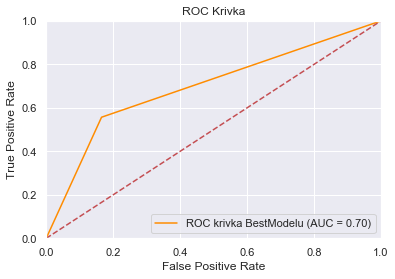

Presnosť (accuracy) BestModelu: 0.7652626597255088
Presnosť (precision) BestModelu: 0.5287769784172662
Návratnosť (recall) BestModelu: 0.5568181818181818


In [37]:
from sklearn.metrics import roc_curve,auc
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_BestModel, pos_label=1) 

# rovnako spocitame AUC koeficient pre model2
roc_auc2 = auc(fpr2, tpr2) 

# vsetky vystupy sme ulozili do premennych identifikovanych cislom 2 - to preto, aby sme neprepisali hodnoty, v ktorych su ulozene koeficienty povodneho modelu

# pomocou matplotlib vykreslíme ROC krivku
plt.title('ROC Krivka') # definujeme názov obrázku
plt.plot(fpr2, tpr2, 'darkorange', label = 'ROC krivka BestModelu (AUC = %0.2f)' % roc_auc2) # vykreslíme ROC krivku, navy farbou, vypíšeme do legendy AUC koeficient
plt.legend(loc = 'lower right') # nastavíme vykreslenie legendy vpravo dole
plt.plot([0, 1], [0, 1],'r--') # vykreslíme červenou (r) prerušovanou farbou diagonálu
plt.xlim([0, 1]) # os x bude nadobúdať hodnoty od 0 do 1
plt.ylim([0, 1]) # os y bude nadobúdať hodnoty od 0 do 1
plt.ylabel('True Positive Rate') # jednotlivé osi otitulkujeme
plt.xlabel('False Positive Rate') # jednotlivé osi otitulkujeme
plt.show() # zobrazíme obrázok
BestModel = KNeighborsClassifier(15)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
print(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")
BestModel = KNeighborsClassifier(15)                    # Natrénovanie

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [39]:
BestModel = KNeighborsClassifier(15)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
print(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

Presnosť (accuracy) BestModelu: 0.7652626597255088
Presnosť (precision) BestModelu: 0.5287769784172662
Návratnosť (recall) BestModelu: 0.5568181818181818


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_BestModel)
print(cm)

[[1323  262]
 [ 234  294]]


In [41]:
from sklearn.preprocessing import LabelEncoder
#Ake data potrebujeme na stromy? - numericke, nie normovane, nie duplikatne (cize nie ordinalne)
data_dt = pd.read_csv("../data/Telecom-Churn.csv")
data_dt = data_dt.drop(columns=["Unnamed: 0", "CustomerID"])

x = data_dt.eval("TotalCharges / Tenure")
data_dt["MonthlyCharges"].fillna(x, inplace=True) 
data_dt["MonthlyCharges"].isna().sum()

y = data_dt.eval("MonthlyCharges * Tenure")
data_dt["TotalCharges"].fillna(y, inplace=True) 
data_dt["TotalCharges"].isna().sum()

data_dt["Dependents"].fillna("No", inplace=True)

data_dt["Gender"] = LabelEncoder().fit_transform(data_dt["Gender"])
data_dt["Partner"] = data_dt["Partner"].map({"No": 0, "Yes": 1})
data_dt["Dependents"] = data_dt["Dependents"].map({"No": 0, "Yes": 1})
data_dt["PhoneService"] = data_dt["PhoneService"].map({"No": 0, "Yes": 1})
data_dt["MultipleLines"] = data_dt["MultipleLines"].map({"No phone service": 0, "No": 1, "Yes": 2})
data_dt["OnlineSecurity"] = data_dt["OnlineSecurity"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["OnlineBackup"] = data_dt["OnlineBackup"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["DeviceProtection"] = data_dt["DeviceProtection"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["TechSupport"] = data_dt["TechSupport"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingTV"] = data_dt["StreamingTV"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingMovies"] = data_dt["StreamingMovies"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["Contract"] = data_dt["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data_dt["PaperlessBilling"] = data_dt["PaperlessBilling"].map({"No": 0, "Yes": 1})
data_dt["Churn"] = data_dt["Churn"].map({"No": 0, "Yes": 1})
data_dt = pd.get_dummies(data_dt, columns=["InternetService", "PaymentMethod"])
data_dt.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,42.30,1840.75,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,70.70,151.65,1,0,1,0,0,0,1,0


In [42]:
X_data_dt = data_dt.drop(columns=["Churn", "TotalCharges"], axis=1) # vytvoríme maticu príznakov - použijeme všetky stĺpce okrem cieľového atribútu a uložíme do X_titanic
y_data_dt = data_dt["Churn"] # vytvoríme vektor hodnôt cieľového atribútu ako stĺpec 'survived'

print(X_data_dt.shape) # pre kontrolu môžeme vypísať rozmery matice hodnôt a vektora cieľového atribútu
print(y_data_dt.shape)

(7043, 23)
(7043,)


In [43]:
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_data_dt, y_data_dt, test_size=0.3, random_state=1)

In [44]:
from sklearn.tree import DecisionTreeClassifier # Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)   # Inicializácia stromového modelu   
dt.fit(X_train_dt, y_train_dt)        # Trénovanie modelu na trénovacej množine 
y_dt = dt.predict(X_test_dt)       # Otestovanie modelu na testovacej množine

from sklearn.metrics import accuracy_score,precision_score, recall_score # vypočítanie metrík kvality modelu

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test_dt, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test_dt, y_dt)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test_dt, y_dt)}")

cm = confusion_matrix(y_test_dt, y_dt)  # vypísanie kontigenčnej tabuľky
print(cm)

Presnosť (accuracy) modelu: 0.8021769995267393
Presnosť (precision) modelu: 0.6883561643835616
Návratnosť (recall) modelu: 0.3806818181818182
[[1494   91]
 [ 327  201]]


In [45]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data_dt.columns.values, class_names=['0','1'], out_file=f)

Pravidlo pre odchadzajuceho zakaznika:   

Ak zakaznik ma contract month-to-month (Contract <=0,5 is True)  
a ma Internetovu sluzbu Fiber Optic  (InternetService_Fiber optic <= 0.5 is False)  
a dlzka je kratsie ako 14,5 mesiaca  (Tenure <= 14.5 is True)   
tak ma tendenciu odist.   (list stromu = 1)  